<a href="https://colab.research.google.com/github/thilinakavirathne/Cat_-Dog_identifier_UsingTensorflow/blob/main/Cat_%26Dog_identifier_UsingTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cat & Dog Identifier-UsingTensorflow**
---
By Thilina Sandamal De Silva

---

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
# Download the dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

# Unzip the dataset
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Define directories for training and validation data
train_dir = '/tmp/cats_and_dogs_filtered/train'
validation_dir = '/tmp/cats_and_dogs_filtered/validation'


--2024-04-25 14:05:19--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.59, 172.217.12.27, 142.250.65.123, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   105MB/s    in 0.6s    

2024-04-25 14:05:19 (105 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
# Data preprocessing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50
)


Epoch 1/15
100/100 [==============================] - 128s 1s/step - loss: 0.6927 - accuracy: 0.5150 - val_loss: 0.7071 - val_accuracy: 0.5020
Epoch 2/15
100/100 [==============================] - 136s 1s/step - loss: 0.6949 - accuracy: 0.5230 - val_loss: 0.6924 - val_accuracy: 0.5290
Epoch 3/15
100/100 [==============================] - 126s 1s/step - loss: 0.6893 - accuracy: 0.5380 - val_loss: 0.6913 - val_accuracy: 0.5170
Epoch 4/15
100/100 [==============================] - 115s 1s/step - loss: 0.6885 - accuracy: 0.5250 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 5/15
100/100 [==============================] - 127s 1s/step - loss: 0.6946 - accuracy: 0.4875 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 6/15
100/100 [==============================] - 113s 1s/step - loss: 0.6932 - accuracy: 0.5120 - val_loss: 0.6929 - val_accuracy: 0.5050
Epoch 7/15
100/100 [==============================] - 112s 1s/step - loss: 0.6934 - accuracy: 0.5340 - val_loss: 0.6902 - val_accuracy: 0.5660

In [ ]:
test_loss, test_acc = model.evaluate(validation_generator, steps=50)
print("Test Accuracy:", test_acc)


50/50 [==============================] - 12s 248ms/step - loss: 0.6867 - accuracy: 0.5300
Test Accuracy: 0.5299999713897705


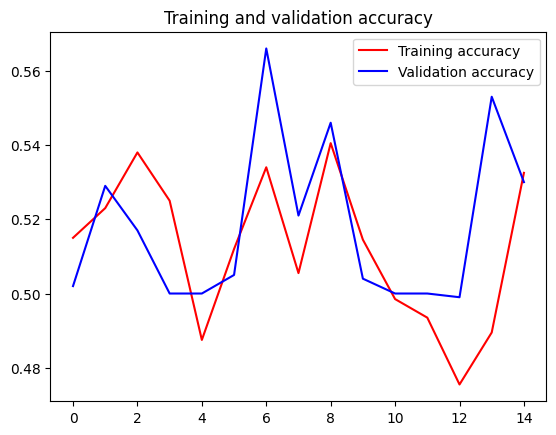

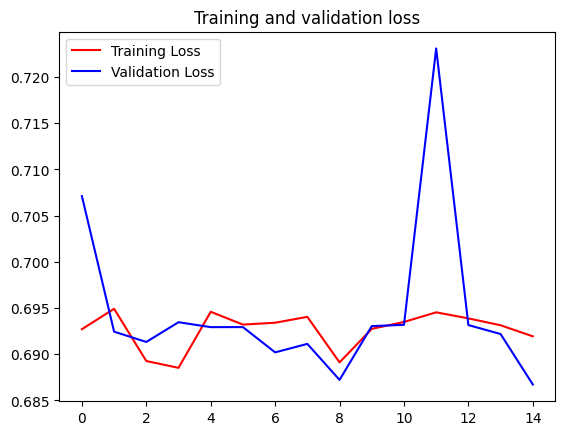

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# **Please Upload jpg file from your pc (CAT or DOG)**
 Download Samples images of cats & Dogs using this Links : [Download SampleData Zip](https://drive.google.com/file/d/1XGZg7T6AUiralXNHfX9-7B8fymB5XvhW/view?usp=drive_link)

 [Download SampleData One By one](https://drive.google.com/drive/folders/1xZAxVNm6OgJtDbyYk4jfYiy-rJleCJgo?usp=sharing)

In [ ]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    img_path = '/content/' + filename
    print('Uploaded image:', img_path)


In [ ]:
from PIL import Image

img = Image.open(img_path)
img = img.resize((150, 150))
img = img.convert('RGB')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array / 255.0
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

prediction = model.predict(img_array)
if prediction[0] < 0.5:
    print("Predicted: Cat")
else:
    print("Predicted: Dog")



1/1 [==============================] - 0s 56ms/step
Predicted: Dog


1/1 [==============================] - 0s 36ms/step


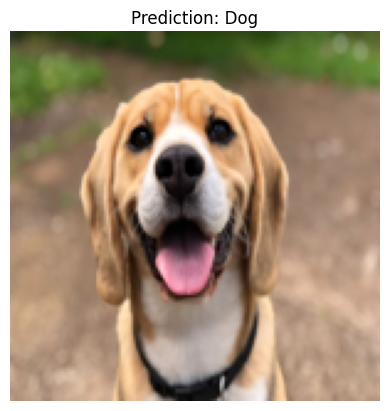

In [ ]:
    prediction = model.predict(img_array)
    if prediction[0] < 0.5:
        pred_label = "Cat"
    else:
        pred_label = "Dog"

    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Prediction: {pred_label}')
    plt.show()
